In [1]:
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import csv # read 
import numpy as np #linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [3]:
train = pd.read_csv('../dataset/train.csv', sep=',', na_values='.') #read csv file, seperated by ;, na values exists
test = pd.read_csv('../dataset/test.csv', sep=',', na_values='.')
train #show data

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739e+00,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144e+00
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,5.988956e-01,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,9.438769e-01,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,1.345191e-02,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472e+00
3,6,1,7.974146e-01,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,2.267384e-03,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483e+00
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
5,9,0,NaN,NaN,C,NaN,8.856791,NaN,NaN,0.359993,...,NaN,NaN,4.986116e-02,X,NaN,NaN,1.536222,0,NaN,NaN
6,12,0,8.998057e-01,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299,1.992594,8.375832e-02,BJ,3.276100,1.623298,2.266575,0,2.263736,9.708730e-01
7,21,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BY,NaN,NaN,NaN,0,NaN,NaN
8,22,0,2.078651e+00,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,...,8.148148,1.875560,1.865950e-02,S,1.159637,5.582865,1.105283,0,1.170731,3.333334e+00
9,23,1,1.144802e+00,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,...,7.325843,4.896617,8.943653e-03,E,1.344550,1.601176,1.928009,0,3.174603,1.000000e+00


In [4]:
"Check the shape of train and test data"
print('Train data size: '+str(train.shape)) #train shape
print('Test data size: '+str(test.shape)) #test shape

Train data size: (114321, 133)
Test data size: (114393, 132)


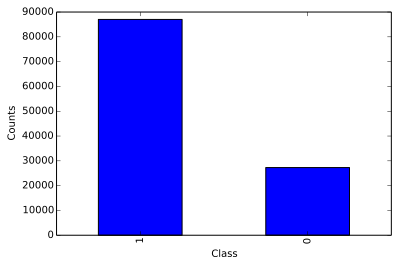

In [5]:
train.target.value_counts().plot.bar() #target variable
plt.xlabel('Class')
plt.ylabel('Counts')
plt.savefig('plot_de1.pdf')

In [6]:
test_numr =test.select_dtypes(include=[np.number])
test_char =test.select_dtypes(include=[np.object])
print("Numerical column count : {}".format(test_numr.shape[1]))
print("Category column count : {}".format(test_char.shape[1]))

Numerical column count : 113
Category column count : 19


In [7]:
train_numr =train.select_dtypes(include=[np.number])
train_char =train.select_dtypes(include=[np.object])
print("Numerical column count : {}".format(train_numr.shape[1]))
print("Category column count : {}".format(train_char.shape[1]))

Numerical column count : 114
Category column count : 19


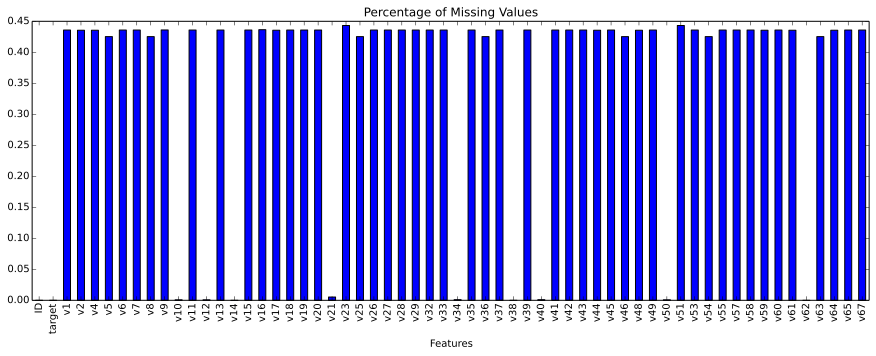

In [14]:
nullvalues = [float((train_numr[col].isnull().sum()))/len(train_numr[col])
              for col in train_numr.columns.values[0:60]]
percentagenull = list(zip(train_numr.columns.values[0:60], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["Features","percantage of missing value (train)"])
nullplot=nullplot.set_index("Features")
fig1 = nullplot.plot.bar(figsize =(15,5),title="Percentage of Missing Values", legend=False)
fig2 = fig1.get_figure()
fig2.savefig('plot_de2a.pdf')

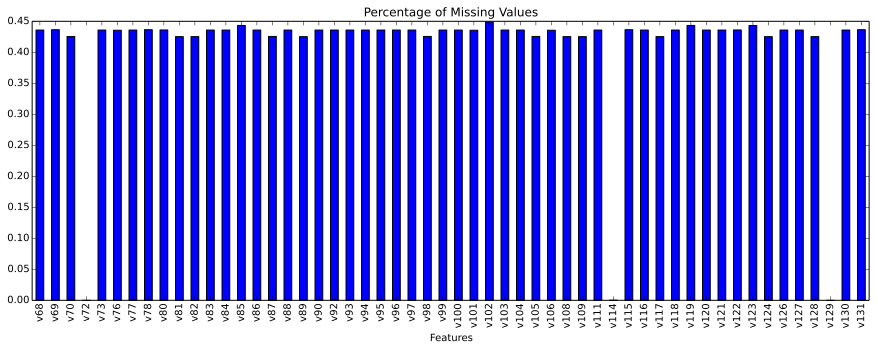

In [15]:
nullvalues = [float((train_numr[col].isnull().sum()))/len(train_numr[col])
              for col in train_numr.columns.values[60:]]
percentagenull = list(zip(train_numr.columns.values[60:], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["Features","percantage of missing value (train)"])
nullplot=nullplot.set_index("Features")
fig1 = nullplot.plot.bar(figsize =(15,5),title="Percentage of Missing Values", legend=False)
fig2 = fig1.get_figure()
fig2.savefig('plot_de2b.pdf')

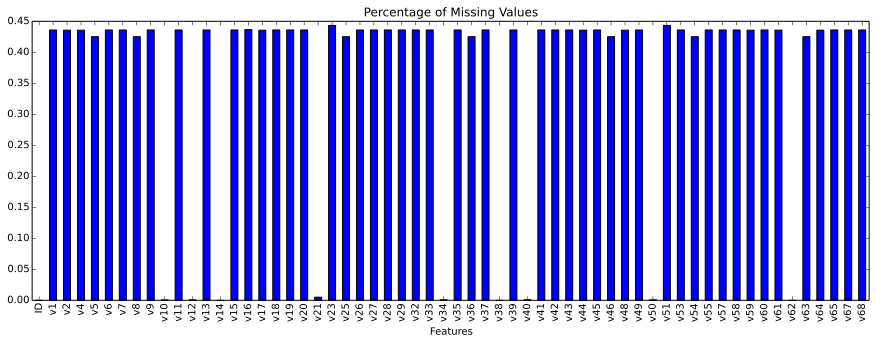

In [16]:
nullvalues = [float((test_numr[col].isnull().sum()))/len(test_numr[col])
              for col in test_numr.columns.values[0:60]]
percentagenull = list(zip(test_numr.columns.values[0:60], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["Features","percantage of missing value (train)"])
nullplot=nullplot.set_index("Features")
fig1 = nullplot.plot.bar(figsize =(15,5),title="Percentage of Missing Values", legend=False)
fig2 = fig1.get_figure()
fig2.savefig('plot_de3a.pdf')

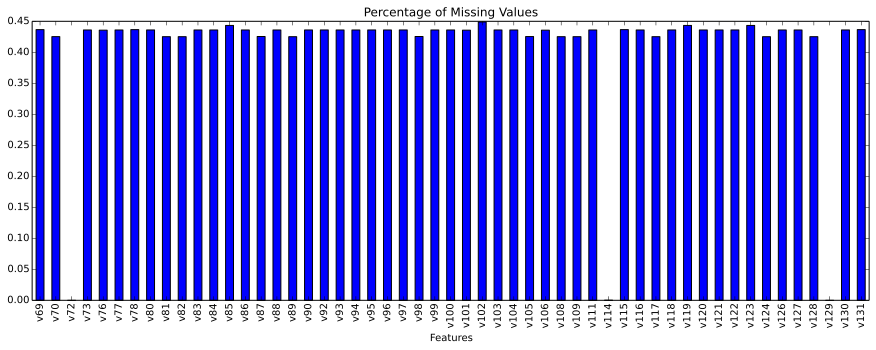

In [17]:
nullvalues = [float((test_numr[col].isnull().sum()))/len(test_numr[col])
              for col in test_numr.columns.values[60:]]
percentagenull = list(zip(test_numr.columns.values[60:], nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["Features","percantage of missing value (train)"])
nullplot=nullplot.set_index("Features")
fig1 = nullplot.plot.bar(figsize =(15,5),title="Percentage of Missing Values", legend=False)
fig2 = fig1.get_figure()
fig2.savefig('plot_de3b.pdf')

In [18]:
"look at charcter features"
name=[]
value=[]
for col in  train_char:
    print(col+" : " +str(len(train_char[col].unique())))
    name.append(col)
    value.append(len(train_char[col].unique()))

v3 : 4
v22 : 18211
v24 : 5
v30 : 8
v31 : 4
v47 : 10
v52 : 13
v56 : 123
v66 : 3
v71 : 9
v74 : 3
v75 : 4
v79 : 18
v91 : 8
v107 : 8
v110 : 3
v112 : 23
v113 : 37
v125 : 91


In [19]:
pd.DataFrame.from_items([('total unique number', value)],
                           orient='index', columns=name)

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
total unique number,4,18211,5,8,4,10,13,123,3,9,3,4,18,8,8,3,23,37,91


In [20]:
"look at charcter features"
name=[]
value=[]
for col in  test_char:
    print(col+" : " +str(len(test_char[col].unique())))
    name.append(col)
    value.append(len(test_char[col].unique()))

v3 : 4
v22 : 18253
v24 : 5
v30 : 8
v31 : 4
v47 : 9
v52 : 13
v56 : 117
v66 : 3
v71 : 9
v74 : 3
v75 : 4
v79 : 17
v91 : 8
v107 : 8
v110 : 3
v112 : 23
v113 : 37
v125 : 91


In [21]:
pd.DataFrame.from_items([('total unique number', value)],
                           orient='index', columns=name)

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
total unique number,4,18253,5,8,4,9,13,117,3,9,3,4,17,8,8,3,23,37,91


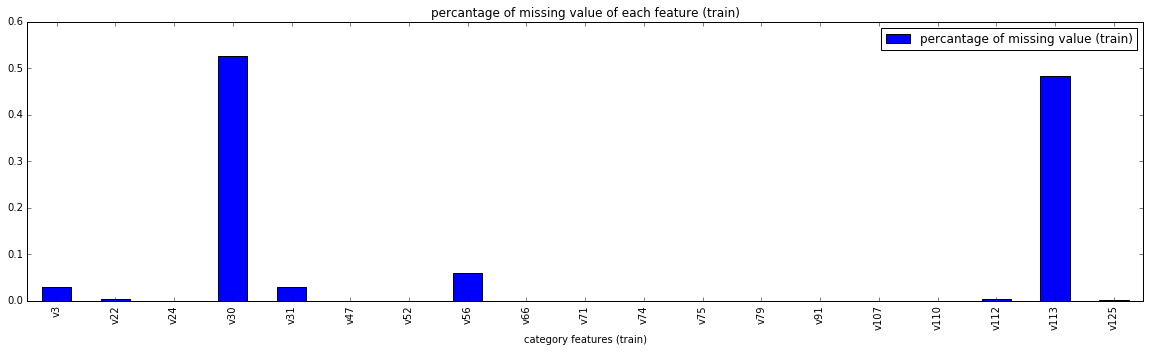

In [26]:
nullvalues = [float((train_char[col].isnull().sum()))/len(train_char[col])
              for col in train_char.columns.values]
percentagenull = list(zip(train_char.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["category features (train)","percantage of missing value (train)"])
nullplot=nullplot.set_index("category features (train)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (train)")

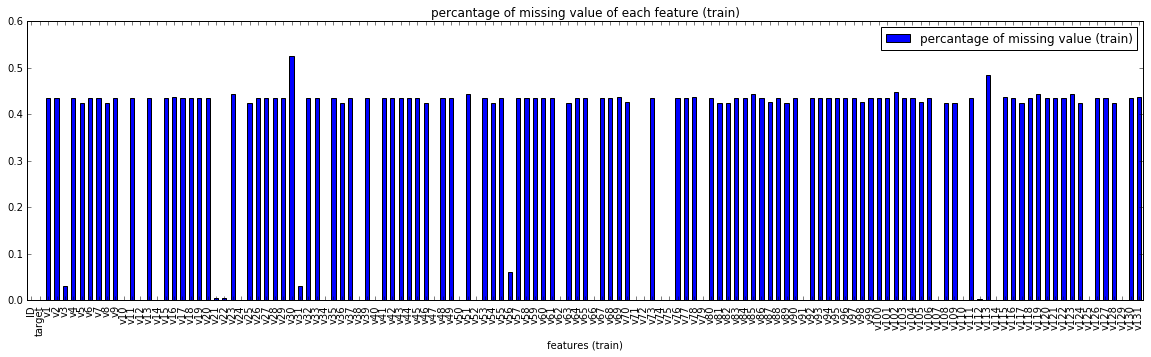

In [27]:
nullvalues = [float((train[col].isnull().sum()))/len(train[col])
              for col in train.columns.values]
percentagenull = list(zip(train.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["features (train)","percantage of missing value (train)"])
nullplot=nullplot.set_index("features (train)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (train)")

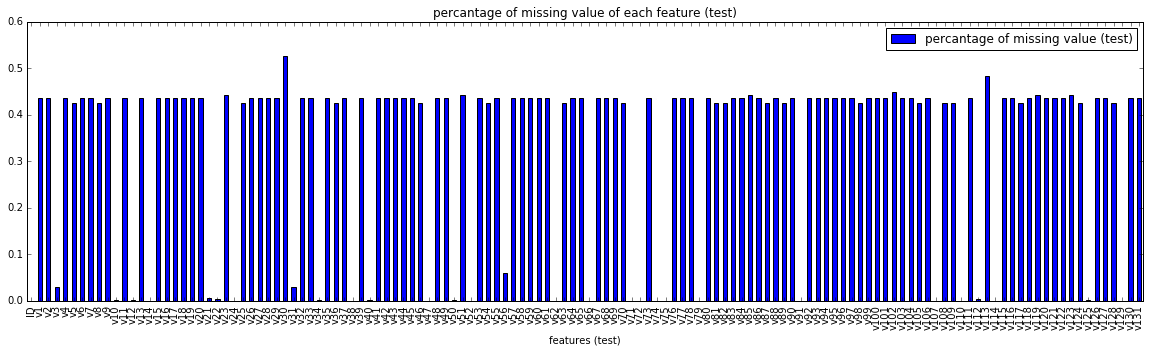

In [28]:
nullvalues = [float((test[col].isnull().sum()))/len(test[col])
              for col in test.columns.values]
percentagenull = list(zip(test.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["features (test)","percantage of missing value (test)"])
nullplot=nullplot.set_index("features (test)")
nullplot.plot.bar(figsize =(20,5),title="percantage of missing value of each feature (test)")

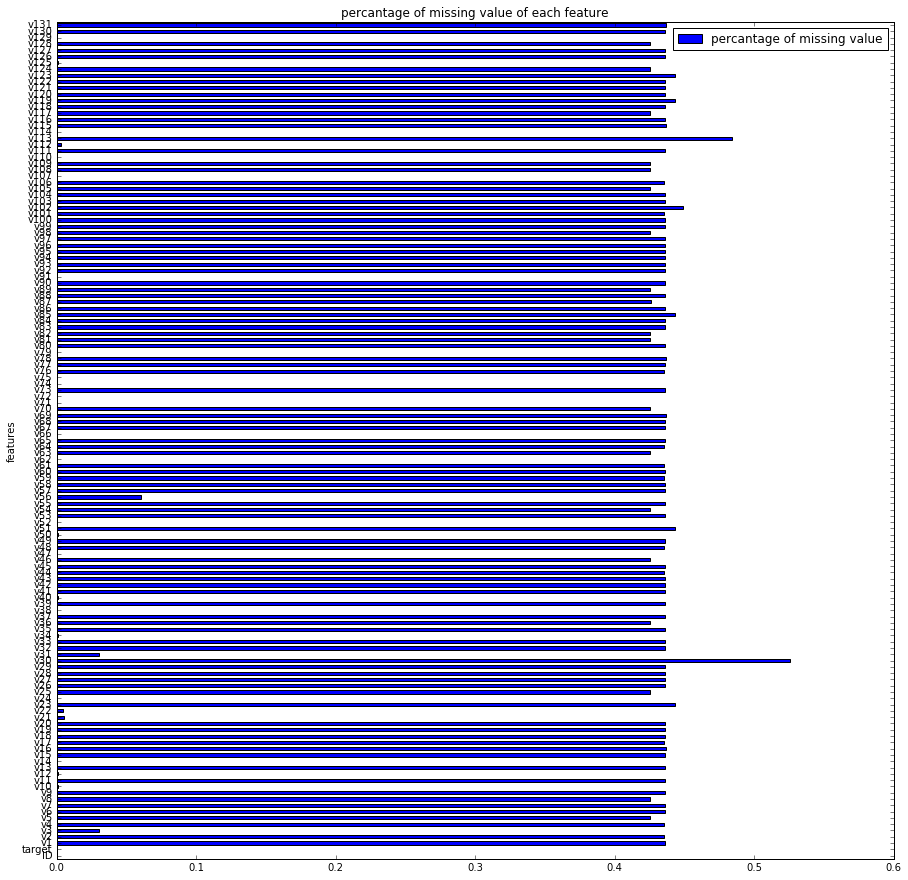

In [29]:
nullvalues = [float((train[col].isnull().sum()))/len(train[col])
              for col in train.columns.values]
percentagenull = list(zip(train.columns.values, nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["features","percantage of missing value"])
nullplot=nullplot.set_index("features")
nullplot.plot.barh(figsize =(15,15),title="percantage of missing value of each feature")

In [30]:
count_row = train.shape[0]
count_col = train.shape[1]
print count_row, count_col

114321 133


In [31]:
arr = [[1, 2, 3]]
print arr

[[1, 2, 3]]


In [32]:
print map(list,zip(*arr))

[[1], [2], [3]]


In [33]:
print [[r[col] for r in arr] for col in range(len(arr[0]))]

[[1], [2], [3]]


In [34]:
a=[['v1', 'v2',' v3'],['a', 2, 3],['b', 2, 3]]
print a
del a[:1]
print a

[['v1', 'v2', ' v3'], ['a', 2, 3], ['b', 2, 3]]
[['a', 2, 3], ['b', 2, 3]]
